In [1]:
#import modules
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport #EDA tool
# from jupyter_datatables import init_datatables_mode
import matplotlib.pyplot as plt
import seaborn as sns 

# %load_ext jupyter_require
# init_datatables_mode()
%matplotlib inline 

C:\Users\JASNYP\AppData\Local\Temp\ipykernel_18196\2924764679.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport #EDA tool


In [2]:
#dataset loading
raw_data = pd.read_csv('coffee_reviews_dataset/arabica_data_cleaned.csv', verbose = True, index_col = 0 )
raw_data.head()

Tokenization took: 2.62 ms
Type conversion took: 11.21 ms
Parser memory cleanup took: 0.00 ms


,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
df = raw_data.copy()

In [4]:
df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Quick look at info().

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1165 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1088 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           1264 non-null   object 
 15  Grad

In [6]:
df.isnull().sum() #some null values ?

Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers                     1
Color     

## I`m using Pandas Profile Report for some quick EDA. ( Its good for 'not so big' datasets)

In [ ]:
report = ProfileReport(df, title='Coffee Review Report')
report.to_file("coffee review report.html")

## Data cleaning.

In [7]:
df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace('.', '_').str.lower()

C:\Users\JASNYP\AppData\Local\Temp\ipykernel_18196\503401136.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_').str.lower()


## I want to keep information only about owner / country / coffee descriptors and altitude of farm.

In [9]:
df = df [['owner', 'country_of_origin','variety','processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points', 'altitude_mean_meters' ]]

In [10]:
df.head()

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1,metad plc,Ethiopia,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0
2,metad plc,Ethiopia,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0
3,grounds for health admin,Guatemala,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,1700.0
4,yidnekachew dabessa,Ethiopia,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0
5,metad plc,Ethiopia,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0


In [11]:
df.shape

(1311, 16)

## Let`s look once again at the report from Pandas Profiling.

In [12]:
report_2 = ProfileReport(df, title='Coffee Review Report 2')
report_2.to_file("coffee review report_2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Still we have some missing cells
## No duplicated rows
## 4 categorical and 12 numerical variable types

## Data cleaning part two

In [13]:
df.owner.isna().sum()

7

In [14]:
df.owner = df.owner.fillna('unknown')
df.head()

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1,metad plc,Ethiopia,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0
2,metad plc,Ethiopia,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0
3,grounds for health admin,Guatemala,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,1700.0
4,yidnekachew dabessa,Ethiopia,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0
5,metad plc,Ethiopia,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0


In [15]:
df.country_of_origin.isna().sum()

1

In [16]:
df[df.country_of_origin.isna()] # we are missing important things about that coffee - let`s drop it

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1198,racafe & cia s.c.a,NaN,NaN,NaN,6.75,6.75,6.42,6.83,7.58,7.5,10.0,10.0,10.0,7.25,79.08,NaN


In [17]:
df = df.drop(index=1198) ## drop that row 

In [18]:
df.variety.isna().sum()

200

In [19]:
df.variety = df.variety.fillna('unknown') 

In [20]:
df.processing_method.isna().sum()

151

In [21]:
df.processing_method = df.processing_method.fillna('unknown')
df.head()

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1,metad plc,Ethiopia,unknown,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0
2,metad plc,Ethiopia,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0
3,grounds for health admin,Guatemala,Bourbon,unknown,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,1700.0
4,yidnekachew dabessa,Ethiopia,unknown,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0
5,metad plc,Ethiopia,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0


In [22]:
df.loc[(df.country_of_origin == 'United States (Hawaii)'),'country_of_origin' ] = 'Hawaii'
df.loc[(df.country_of_origin == 'Tanzania, United Republic Of'),'country_of_origin' ] = 'Tanzania'
df.loc[(df.country_of_origin == 'United States (Puerto Rico)'),'country_of_origin' ] = 'Puerto Rico'

In [23]:
df.country_of_origin.unique() # 

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'Hawaii', 'Indonesia', 'China', 'Costa Rica', 'Mexico', 'Uganda',
       'Honduras', 'Taiwan', 'Nicaragua', 'Tanzania', 'Kenya', 'Thailand',
       'Colombia', 'Panama', 'Papua New Guinea', 'El Salvador', 'Japan',
       'Ecuador', 'Puerto Rico', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

## Altitude_mean_meters is giving us information about how high above the sea level is the farm. Usually farms are located in the mountians but not as high as 10 000 meters above the sea level. Let`s clean that data.

In [24]:
df.altitude_mean_meters.describe()

count      1084.000000
mean       1784.196379
std        8767.016913
min           1.000000
25%        1100.000000
50%        1310.640000
75%        1600.000000
max      190164.000000
Name: altitude_mean_meters, dtype: float64

## Min (1) and max (190164.000000) value of altitude is somehow wrong ... Lets replace all 'funny values' with the median value for country of origin. Altitude is not the most important value in our dataset but I need to fix those as well. Let 's look at outliers in altitude_mean_meters column. I will try to fix it.

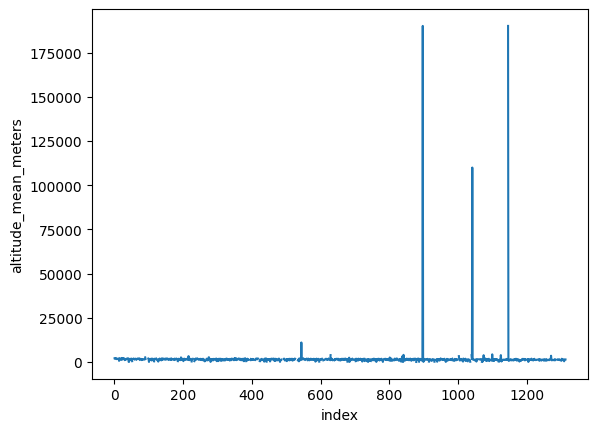

In [25]:
plt.plot(df.altitude_mean_meters)
plt.xlabel('index')
plt.ylabel('altitude_mean_meters')
plt.show()

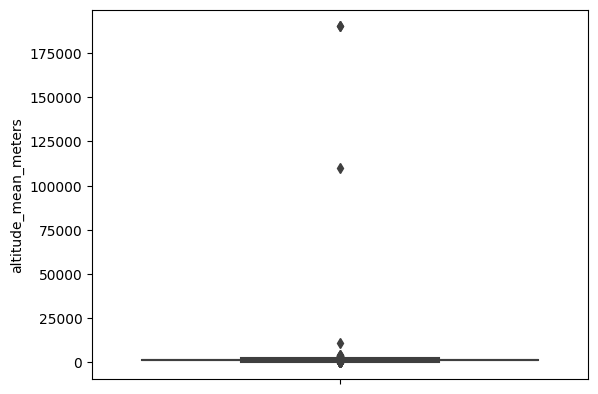

In [26]:
sns.boxplot(y = df.altitude_mean_meters ) # lets look at outliers 
plt.show()

In [27]:
df.altitude_mean_meters.isna().sum() # do we have some missing values ? 

226

In [28]:
countries_nan = df[df.altitude_mean_meters.isna()].country_of_origin.unique()
countries_nan  # missing values are in those countries 

array(['Brazil', 'Peru', 'Ethiopia', 'Nicaragua', 'Tanzania', 'Hawaii',
       'Uganda', 'Guatemala', 'Colombia', 'Kenya', 'Thailand',
       'Costa Rica', 'Indonesia', 'Taiwan', 'Mexico', 'El Salvador',
       'Honduras', 'India'], dtype=object)

In [29]:
for country in countries_nan:
    median_value = df[df.country_of_origin == f'{country}'].altitude_mean_meters.median()
    print(f'{country}: {median_value}')

Brazil: 1000.0
Peru: 1300.0
Ethiopia: 1800.0
Nicaragua: 1100.0
Tanzania: 1600.0
Hawaii: 518.1600000000001
Uganda: 1675.0
Guatemala: 1395.4012
Colombia: 1750.0
Kenya: 1754.0
Thailand: 1000.0
Costa Rica: 1300.0
Indonesia: 1350.0
Taiwan: 750.0
Mexico: 1250.0
El Salvador: 1350.0
Honduras: 1400.0
India: nan


C:\Users\JASNYP\Desktop\Python Projects\coffee_reviews\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [30]:
for country in countries_nan:
    median_value = df[df.country_of_origin == f'{country}'].altitude_mean_meters.median()
    df.loc[df.country_of_origin == f'{country}', 'altitude_mean_meters'] = df.loc[df.country_of_origin == f'{country}', 'altitude_mean_meters'].fillna(median_value)
    
df.altitude_mean_meters.isna().sum()

C:\Users\JASNYP\Desktop\Python Projects\coffee_reviews\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


1

In [31]:
df[df.altitude_mean_meters.isna()] #still missing

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1261,joshua marsceau,India,unknown,Natural / Dry,7.67,7.33,7.17,6.67,7.17,7.42,9.33,10.0,6.67,7.42,76.83,NaN


In [32]:
df.drop(index = 1261, inplace = True)

In [33]:
df.altitude_mean_meters.isna().sum()

0

In [34]:
df.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'Hawaii', 'Indonesia', 'China', 'Costa Rica', 'Mexico', 'Uganda',
       'Honduras', 'Taiwan', 'Nicaragua', 'Tanzania', 'Kenya', 'Thailand',
       'Colombia', 'Panama', 'Papua New Guinea', 'El Salvador', 'Japan',
       'Ecuador', 'Puerto Rico', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire'], dtype=object)

In [35]:
df.altitude_mean_meters.describe() # let`s look again at min and max value 

count      1309.000000
mean       1666.922280
std        7984.028255
min           1.000000
25%        1000.000000
50%        1310.640000
75%        1600.000000
max      190164.000000
Name: altitude_mean_meters, dtype: float64

In [36]:
df[df.altitude_mean_meters == df.altitude_mean_meters.max()]

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
897,juan luis alvarado romero,Guatemala,Bourbon,Washed / Wet,7.42,7.42,7.08,7.50,7.42,7.33,10.00,10.00,10.00,7.42,81.58,190164.0
1145,juan luis alvarado romero,Guatemala,Bourbon,Washed / Wet,7.50,7.42,7.25,7.58,7.33,7.42,9.33,9.33,9.33,7.25,79.75,190164.0


In [37]:
df[df.country_of_origin =='Guatemala'].altitude_mean_meters.describe()

count       181.000000
mean       3519.811176
std       19786.540052
min         157.886400
25%        1310.640000
50%        1395.401200
75%        1524.000000
max      190164.000000
Name: altitude_mean_meters, dtype: float64

## I have some "funny" values in altitude_mean_meters column. I dont want to delete any record. My idea is to replace some outliers with median value ( not mean ! ). Let`s just look at min and max value

In [38]:
median_altitude_guatemala = df[df.country_of_origin == 'Guatemala'].altitude_mean_meters.median()
max_altitude_guatemala =  df[df.country_of_origin == 'Guatemala'].altitude_mean_meters.max()
min_altitude_guatemala =  df[df.country_of_origin == 'Guatemala'].altitude_mean_meters.min()

print(f'median altitude for Guatemala: {median_altitude_guatemala}')
print(f'max altitude for Guatemala: {max_altitude_guatemala}')
print(f'min altitude for Guatemala: {min_altitude_guatemala}')

median altitude for Guatemala: 1395.4012
max altitude for Guatemala: 190164.0
min altitude for Guatemala: 157.8864


In [39]:
df[df.altitude_mean_meters == 190164]

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
897,juan luis alvarado romero,Guatemala,Bourbon,Washed / Wet,7.42,7.42,7.08,7.50,7.42,7.33,10.00,10.00,10.00,7.42,81.58,190164.0
1145,juan luis alvarado romero,Guatemala,Bourbon,Washed / Wet,7.50,7.42,7.25,7.58,7.33,7.42,9.33,9.33,9.33,7.25,79.75,190164.0


In [40]:
df = df.replace(to_replace = 190164.000000, value = 1395.0 ) #  max value - in Guatemala - replace with median value from Guatemala

In [41]:
df[df.country_of_origin =='Guatemala'].altitude_mean_meters.describe() # lets look again

count     181.000000
mean     1433.965872
std       339.341173
min       157.886400
25%      1310.640000
50%      1395.401200
75%      1524.000000
max      3280.000000
Name: altitude_mean_meters, dtype: float64

In [42]:
df[df.country_of_origin =='Guatemala'].altitude_mean_meters.median()

1395.4012

In [43]:
#replace min with median value
min_altitude_guatemala = df[df.country_of_origin == 'Guatemala'].altitude_mean_meters.min()
median_altitude_guatemala = df[df.country_of_origin == 'Guatemala'].altitude_mean_meters.median()
df.loc[(df.country_of_origin =='Guatemala') & (df.altitude_mean_meters == min_altitude_guatemala) , 'altitude_mean_meters'] = median_altitude_guatemala

df[df.country_of_origin =='Guatemala'].altitude_mean_meters.describe()

count     181.000000
mean     1454.477167
std       295.997502
min      1099.413600
25%      1310.640000
50%      1395.401200
75%      1524.000000
max      3280.000000
Name: altitude_mean_meters, dtype: float64

In [44]:
max_altitude_guatemala = df[df.country_of_origin == 'Guatemala'].altitude_mean_meters.max()
median_altitude_guatemala = df[df.country_of_origin == 'Guatemala'].altitude_mean_meters.median()
df.loc[(df.country_of_origin =='Guatemala') & (df.altitude_mean_meters == max_altitude_guatemala), 'altitude_mean_meters'] = median_altitude_guatemala # replace max with median
df[df.country_of_origin =='Guatemala'].altitude_mean_meters.describe()

count     181.000000
mean     1423.240723
std       176.491713
min      1099.413600
25%      1310.640000
50%      1395.401200
75%      1524.000000
max      2100.000000
Name: altitude_mean_meters, dtype: float64

## Minimum altitude_mean_meters value for Guatemala is 1099 - and it is possible. Same with max value - 2100. 

<AxesSubplot: ylabel='Density'>

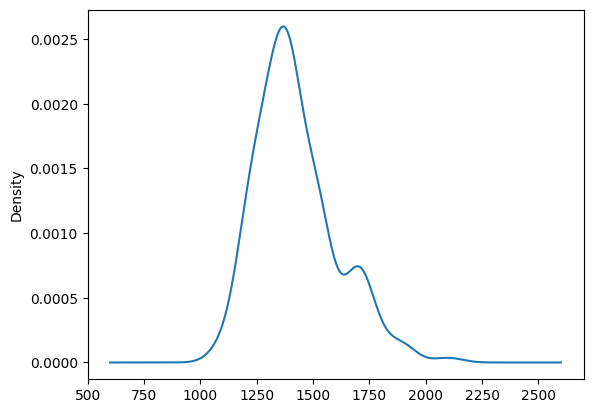

In [45]:
filter_guatemala = df[df.country_of_origin =='Guatemala']['altitude_mean_meters']
filter_guatemala.plot.kde()

<AxesSubplot: >

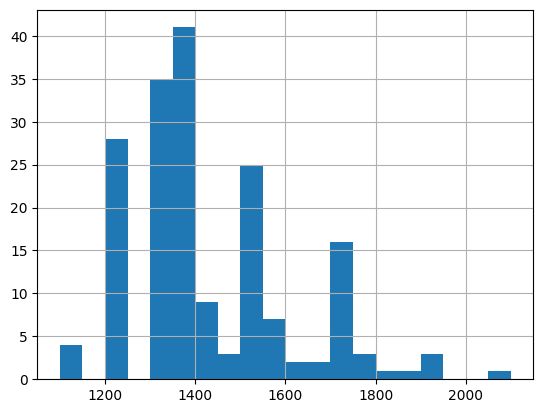

In [46]:
filter_guatemala.hist(bins = 20)

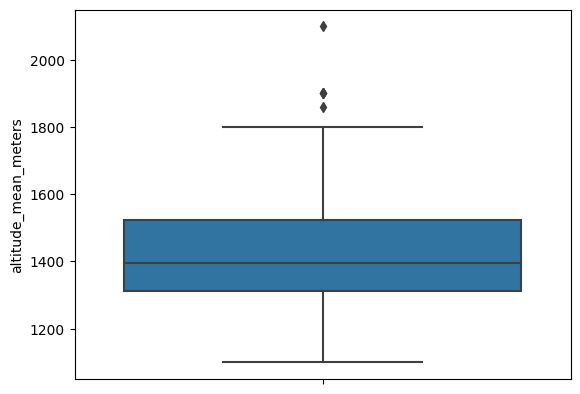

In [47]:
sns.boxplot(y = filter_guatemala ) # lets look at outliers 
plt.show()

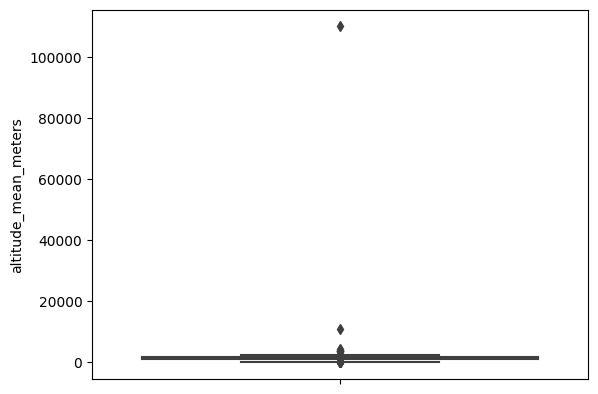

In [48]:
sns.boxplot(y = df.altitude_mean_meters ) # lets look at outliers in dataset
plt.show()

In [49]:
df.altitude_mean_meters.describe()

count      1309.000000
mean       1377.022164
std        3053.012985
min           1.000000
25%        1020.000000
50%        1310.640000
75%        1600.000000
max      110000.000000
Name: altitude_mean_meters, dtype: float64

In [50]:
df[df.altitude_mean_meters == df.altitude_mean_meters.max()]  # max value for altitude_mean_meters again

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1041,"comercial internacional exportadora, s.a.",Nicaragua,Other,Washed / Wet,7.25,7.25,7.17,7.25,7.33,7.25,10.0,10.0,10.0,7.25,80.75,110000.0


In [51]:
df[df.country_of_origin =='Nicaragua'].altitude_mean_meters.describe() # lets replace max with median value

count        26.000000
mean       5283.173077
std       21358.303696
min         900.000000
25%        1062.500000
50%        1100.000000
75%        1100.000000
max      110000.000000
Name: altitude_mean_meters, dtype: float64

In [52]:
max_altitude_nicaragua = df[df.country_of_origin =='Nicaragua'].altitude_mean_meters.max()
median_altitude_nicaragua = df[df.country_of_origin =='Nicaragua'].altitude_mean_meters.median()
df.loc[(df.country_of_origin =='Nicaragua') & (df.altitude_mean_meters == max_altitude_nicaragua), 'altitude_mean_meters' ] =  median_altitude_nicaragua
df[df.country_of_origin =='Nicaragua'].altitude_mean_meters.describe()

count      26.000000
mean     1094.711538
std        87.190386
min       900.000000
25%      1062.500000
50%      1100.000000
75%      1100.000000
max      1250.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

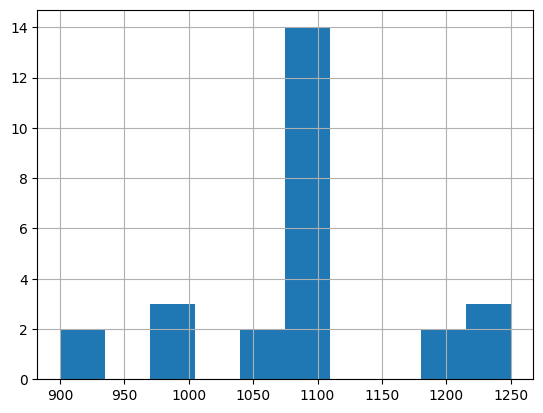

In [53]:
filter_nicaragua = df[df.country_of_origin == 'Nicaragua'].altitude_mean_meters
filter_nicaragua.hist()

In [54]:
df.altitude_mean_meters.describe() # Again DataFrame

count     1309.000000
mean      1293.828886
std        541.678471
min          1.000000
25%       1020.000000
50%       1310.640000
75%       1600.000000
max      11000.000000
Name: altitude_mean_meters, dtype: float64

In [55]:
df[df.altitude_mean_meters  == df.altitude_mean_meters.max()]

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
544,expocaccer coop dos cafeic do cerrado ltda,Brazil,Moka Peaberry,Semi-washed / Semi-pulped,7.08,7.5,7.5,7.83,7.75,7.67,10.0,10.0,10.0,7.58,82.92,11000.0


In [56]:
df[df.country_of_origin == 'Brazil'].altitude_mean_meters.describe() # 

count      132.000000
mean      1013.340909
std        940.489450
min          1.000000
25%        905.000000
50%       1000.000000
75%       1100.000000
max      11000.000000
Name: altitude_mean_meters, dtype: float64

In [57]:
max_altitude_brazil = df[df.country_of_origin == 'Brazil'].altitude_mean_meters.max()
median_altitude_brazil = df[df.country_of_origin == 'Brazil'].altitude_mean_meters.median()
df.loc[(df.country_of_origin == 'Brazil') & ( df.altitude_mean_meters == max_altitude_brazil), 'altitude_mean_meters'] = median_altitude_brazil
df[df.country_of_origin == 'Brazil'].altitude_mean_meters.describe() # 

count     132.000000
mean      937.583333
std       342.659286
min         1.000000
25%       905.000000
50%      1000.000000
75%      1100.000000
max      1300.000000
Name: altitude_mean_meters, dtype: float64

In [58]:
df[df.altitude_mean_meters == df.altitude_mean_meters.min()] # lets look at the min value

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
101,simon mahinda,Kenya,unknown,Washed / Wet,8.17,7.83,7.92,7.75,7.67,7.83,10.0,10.0,10.0,7.83,85.00,1.0
280,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.25,7.58,7.42,8.00,7.75,7.83,10.0,10.0,10.0,8.00,83.83,1.0
482,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.33,7.67,7.67,7.33,7.75,7.42,10.0,10.0,10.0,7.92,83.08,1.0
614,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.58,7.50,7.42,7.67,7.50,7.50,10.0,10.0,10.0,7.50,82.67,1.0
684,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.17,7.83,7.33,7.50,7.75,7.42,10.0,10.0,10.0,7.42,82.42,1.0
738,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.42,7.67,7.50,7.08,7.50,7.42,10.0,10.0,10.0,7.67,82.25,1.0
762,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,6.92,7.58,7.42,7.33,7.83,7.50,10.0,10.0,10.0,7.58,82.17,1.0
781,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.25,7.25,7.58,7.58,7.25,7.92,10.0,10.0,10.0,7.25,82.08,1.0
839,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.17,7.58,6.83,7.50,7.75,7.25,10.0,10.0,10.0,7.75,81.83,1.0
840,ipanema coffees,Brazil,Yellow Bourbon,Natural / Dry,7.58,7.00,6.92,6.92,7.67,7.50,10.0,10.0,10.0,8.25,81.83,1.0


In [59]:
df[df.country_of_origin == 'Kenya'].altitude_mean_meters.describe() # just one record from Kenya 

count      25.000000
mean     1522.480000
std       547.263942
min         1.000000
25%      1580.000000
50%      1754.000000
75%      1800.000000
max      2000.000000
Name: altitude_mean_meters, dtype: float64

In [60]:
median_kenya_altitude = df.loc[(df.country_of_origin =='Kenya')].altitude_mean_meters.median()
min_kenya_altitude = df.loc[(df.country_of_origin == 'Kenya')].altitude_mean_meters.min()

In [61]:
df.loc[(df.country_of_origin == 'Kenya') & (df.altitude_mean_meters == min_kenya_altitude) , 'altitude_mean_meters'] = median_kenya_altitude
df[df.country_of_origin == 'Kenya'].altitude_mean_meters.describe()

count      25.000000
mean     1592.600000
std       447.387206
min       250.500000
25%      1600.000000
50%      1754.000000
75%      1800.000000
max      2000.000000
Name: altitude_mean_meters, dtype: float64

In [62]:
min_kenya_altitude = df.loc[(df.country_of_origin == 'Kenya')].altitude_mean_meters.min()
df.loc[(df.country_of_origin == 'Kenya') & (df.altitude_mean_meters == min_kenya_altitude ) , 'altitude_mean_meters'] =  median_kenya_altitude
df[df.country_of_origin == 'Kenya']['altitude_mean_meters'].describe()

count      25.000000
mean     1712.880000
std       192.752069
min      1200.000000
25%      1650.000000
50%      1754.000000
75%      1800.000000
max      2000.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

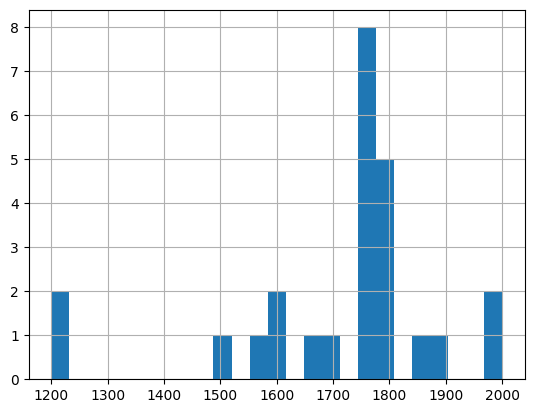

In [63]:
df[df.country_of_origin == 'Kenya'].altitude_mean_meters.hist(bins = 25)

In [64]:
df[df.country_of_origin == 'Brazil'].altitude_mean_meters.describe() # Brazil 

count     132.000000
mean      937.583333
std       342.659286
min         1.000000
25%       905.000000
50%      1000.000000
75%      1100.000000
max      1300.000000
Name: altitude_mean_meters, dtype: float64

In [65]:
min_altitude_brazil = df[df.country_of_origin == 'Brazil'].altitude_mean_meters.min()
median_altitude_brazil = df[df.country_of_origin == 'Brazil'].altitude_mean_meters.median()
df.loc[(df.country_of_origin == 'Brazil') & (df.altitude_mean_meters  ==  min_altitude_brazil ), 'altitude_mean_meters'] = median_altitude_brazil

In [66]:
df[df.country_of_origin == 'Brazil'].altitude_mean_meters.describe()

count     132.000000
mean     1020.833333
std       192.618831
min        12.000000
25%       967.250000
50%      1000.000000
75%      1100.000000
max      1300.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: ylabel='Density'>

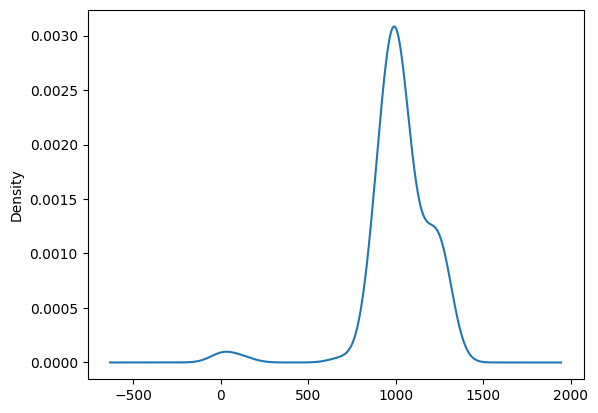

In [67]:
filter_brazil  = df[df.country_of_origin == 'Brazil'].altitude_mean_meters
filter_brazil.plot.kde()

<AxesSubplot: >

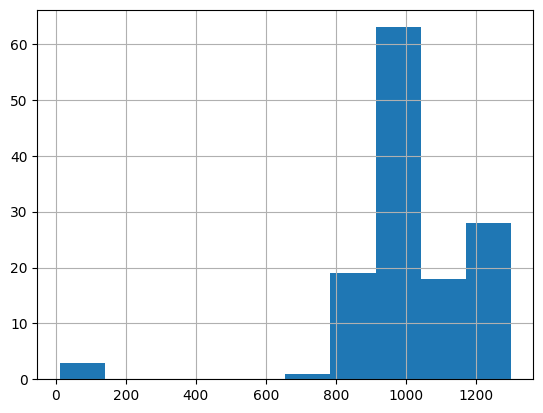

In [68]:
filter_brazil.hist()

In [69]:
df.loc[(df.country_of_origin == 'Brazil') & (df.altitude_mean_meters  < 800 ), 'altitude_mean_meters'] = median_altitude_brazil

In [70]:
df[df.country_of_origin == 'Brazil'].altitude_mean_meters.describe()

count     132.000000
mean     1044.742424
std       118.594464
min       872.000000
25%       998.750000
50%      1000.000000
75%      1100.000000
max      1300.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

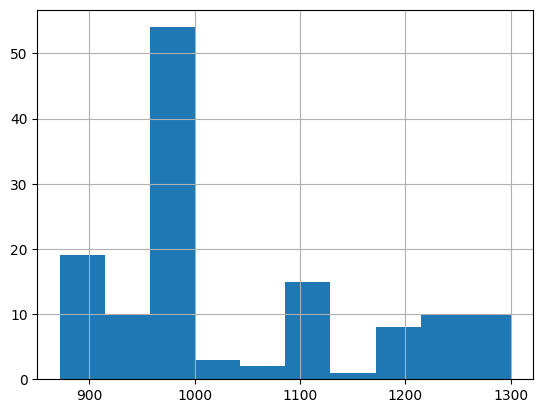

In [71]:
df[df.country_of_origin == 'Brazil'].altitude_mean_meters.hist() 

In [72]:
df.altitude_mean_meters.describe()

count    1309.000000
mean     1300.631789
std       449.506173
min        12.000000
25%      1038.500000
50%      1310.640000
75%      1600.000000
max      4287.000000
Name: altitude_mean_meters, dtype: float64

In [73]:
df[df.altitude_mean_meters == df.altitude_mean_meters.min() ] # still hamve some min() value wrong 

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1204,juan avenamar rodriguez funez,Mexico,Typica,Washed / Wet,7.17,6.83,6.83,7.25,7.17,6.92,10.0,10.0,10.0,6.83,79.0,12.0


In [74]:
df[df.country_of_origin == 'Mexico'].altitude_mean_meters.describe()

count     236.000000
mean     1235.610169
std       263.481907
min        12.000000
25%      1100.000000
50%      1250.000000
75%      1400.000000
max      1800.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

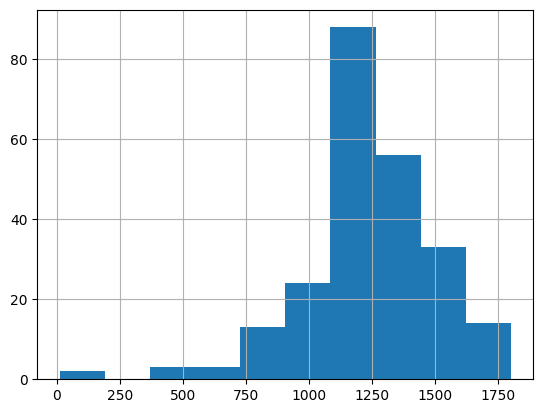

In [75]:
df[df.country_of_origin == 'Mexico'].altitude_mean_meters.hist()

In [76]:
df.loc[(df.country_of_origin == 'Mexico') & (df.altitude_mean_meters  < 800 ), 'altitude_mean_meters'] = df.loc[(df.country_of_origin == 'Mexico')].altitude_mean_meters.median() # decision is to replace all the value below 800 with median value

<AxesSubplot: >

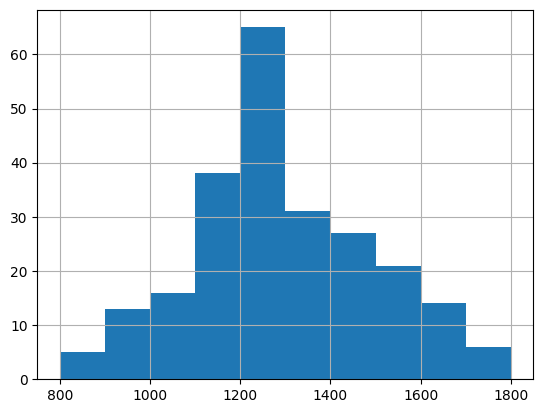

In [77]:
df[df.country_of_origin == 'Mexico'].altitude_mean_meters.hist()

In [78]:
df.altitude_mean_meters.describe()

count    1309.000000
mean     1306.938130
std       443.246479
min        13.000000
25%      1050.000000
50%      1310.640000
75%      1600.000000
max      4287.000000
Name: altitude_mean_meters, dtype: float64

In [79]:
df[df.altitude_mean_meters < 800].country_of_origin.unique() # still a lot of values are somehow wrong - I dont want to delete those records

array(['Hawaii', 'Taiwan', 'Japan', 'Colombia', 'Tanzania', 'Costa Rica',
       'Mauritius', 'Cote d?Ivoire', 'Haiti'], dtype=object)

In [80]:
df[df.country_of_origin == 'Hawaii'].altitude_mean_meters.describe() # 

count     73.00
mean     518.16
std       15.24
min      426.72
25%      518.16
50%      518.16
75%      518.16
max      609.60
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

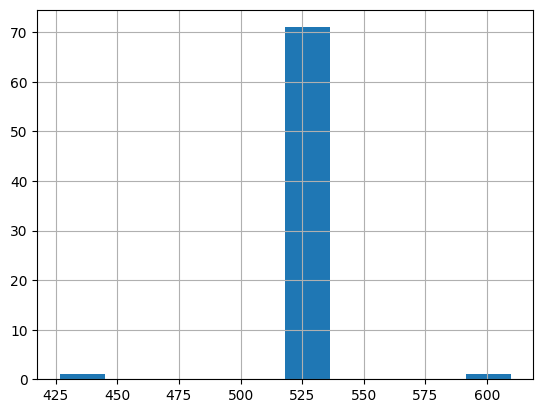

In [81]:
df[df.country_of_origin == 'Hawaii'].altitude_mean_meters.hist()

In [82]:
df[df.country_of_origin == 'Taiwan'].altitude_mean_meters.describe()

count      75.000000
mean      730.653333
std       317.341895
min        50.000000
25%       600.000000
50%       750.000000
75%       984.000000
max      1300.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

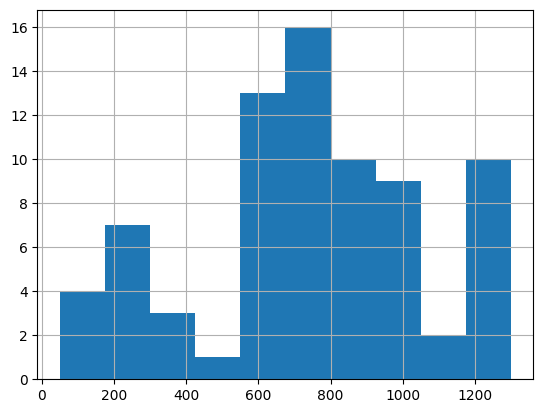

In [83]:
df[df.country_of_origin == 'Taiwan'].altitude_mean_meters.hist()

In [84]:
df[df.country_of_origin == 'Colombia'].altitude_mean_meters.describe() # ""

count     183.000000
mean     1615.278689
std       441.900558
min       165.000000
25%      1600.000000
50%      1750.000000
75%      1775.000000
max      3850.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

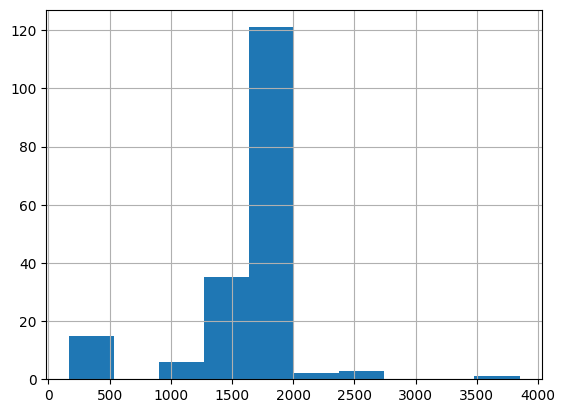

In [85]:
df[df.country_of_origin == 'Colombia'].altitude_mean_meters.hist()

In [86]:
median_altitude_colombia = df[df.country_of_origin == 'Colombia'].altitude_mean_meters.median()
df.loc[(df.country_of_origin == 'Colombia') & (df.altitude_mean_meters < 1000 ), 'altitude_mean_meters'] = median_altitude_colombia

In [87]:
df[df.country_of_origin == 'Colombia'].altitude_mean_meters.describe()

count     183.000000
mean     1725.480874
std       251.476013
min      1000.000000
25%      1700.000000
50%      1750.000000
75%      1775.000000
max      3850.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

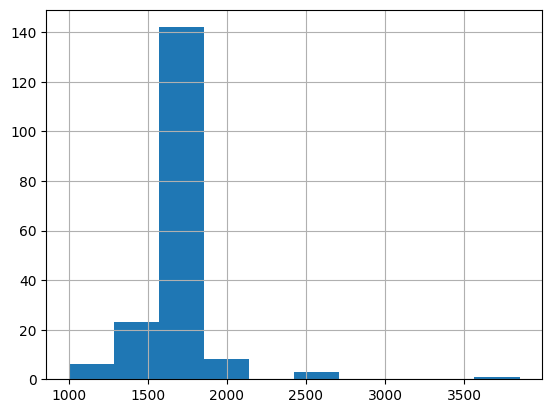

In [88]:
df[df.country_of_origin == 'Colombia'].altitude_mean_meters.hist()

In [89]:
max_altitude_colombia = df[df.country_of_origin == 'Colombia'].altitude_mean_meters.max()
df.loc[(df.country_of_origin == 'Colombia') & (df.altitude_mean_meters == max_altitude_colombia), 'altitude_mean_meters'] = median_altitude_colombia

<AxesSubplot: >

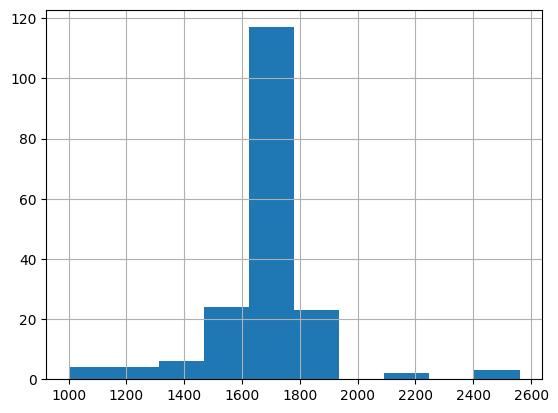

In [90]:
df[df.country_of_origin == 'Colombia'].altitude_mean_meters.hist()

In [91]:
df[df.country_of_origin == 'Costa Rica'].altitude_mean_meters.describe()

count      51.000000
mean     1372.278431
std       415.096984
min        13.000000
25%      1300.000000
50%      1300.000000
75%      1700.000000
max      1900.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

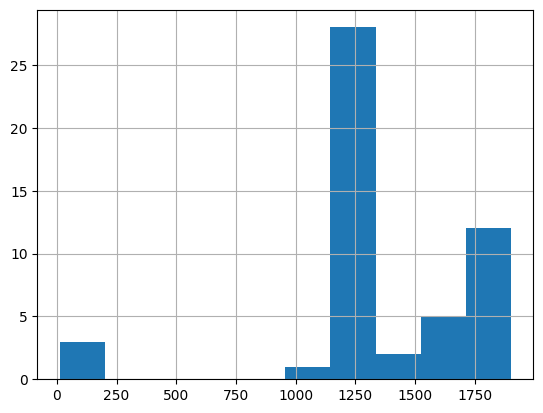

In [92]:
df[df.country_of_origin == 'Costa Rica'].altitude_mean_meters.hist()

In [93]:
median_altitude_costarica = df[df.country_of_origin == 'Costa Rica'].altitude_mean_meters.median()
df.loc[(df.country_of_origin == 'Costa Rica') & (df.altitude_mean_meters < 1000 ), 'altitude_mean_meters' ] = median_altitude_costarica #  

In [94]:
df[df.country_of_origin == 'Costa Rica'].altitude_mean_meters.describe()

count      51.000000
mean     1444.611765
std       255.311745
min      1100.000000
25%      1300.000000
50%      1300.000000
75%      1700.000000
max      1900.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

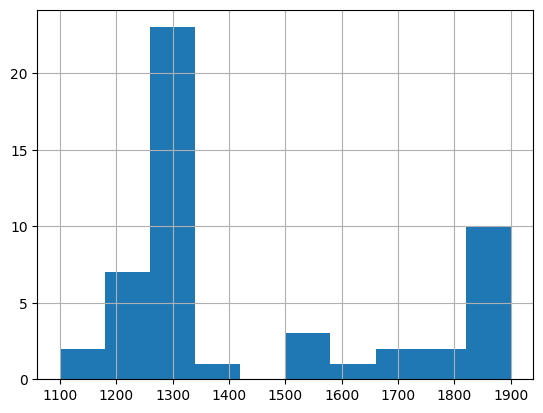

In [95]:
df[df.country_of_origin == 'Costa Rica'].altitude_mean_meters.hist()

In [96]:
df[df.altitude_mean_meters < 800].country_of_origin.unique() # quick look again 

array(['Hawaii', 'Taiwan', 'Japan', 'Tanzania', 'Mauritius',
       'Cote d?Ivoire', 'Haiti'], dtype=object)

In [97]:
df[df.country_of_origin == 'Japan'] # one record from Japan - lets delete it 

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
128,松澤宏樹 koju matsuzawa,Japan,Mundo Novo,Pulped natural / honey,7.75,7.75,7.75,7.42,8.08,7.83,10.0,10.0,10.0,8.08,84.67,170.0


In [98]:
df.drop(index = 128, inplace = True)

In [99]:
df[df.country_of_origin == 'Tanzania' ].altitude_mean_meters.describe()

count      40.000000
mean     1565.525000
std       295.439524
min       168.000000
25%      1500.000000
50%      1600.000000
75%      1700.000000
max      2285.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

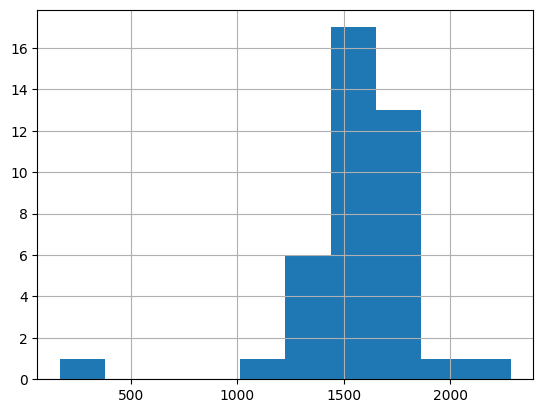

In [100]:
df[df.country_of_origin == 'Tanzania' ].altitude_mean_meters.hist()

In [101]:
median_altitude_tanzania = df[df.country_of_origin == 'Tanzania'].altitude_mean_meters.median()
df.loc[(df.country_of_origin == 'Tanzania') & (df.altitude_mean_meters < 1000), 'altitude_mean_meters'] = median_altitude_tanzania

<AxesSubplot: >

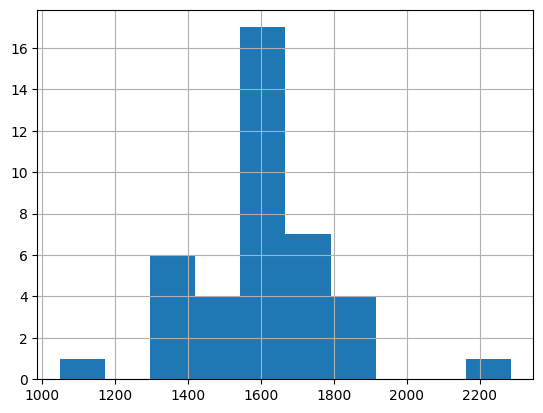

In [102]:
df[df.country_of_origin == 'Tanzania' ].altitude_mean_meters.hist()

In [103]:
df[df.country_of_origin == 'Mauritius'].altitude_mean_meters.describe()

count      1.0
mean     280.0
std        NaN
min      280.0
25%      280.0
50%      280.0
75%      280.0
max      280.0
Name: altitude_mean_meters, dtype: float64

In [104]:
df[df.country_of_origin == 'Mauritius']

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1072,case noyale ltd,Mauritius,unknown,unknown,7.25,7.25,7.17,7.17,7.25,7.17,10.0,10.0,10.0,7.25,80.5,280.0


In [105]:
df.drop(index=1072, inplace =True)

In [106]:
df.loc[(df.country_of_origin == 'Cote d?Ivoire')]

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1178,rre kunene,Cote d?Ivoire,unknown,Washed / Wet,7.42,7.25,6.83,7.0,7.33,7.08,9.33,10.0,10.0,7.08,79.33,200.0


In [107]:
df.drop(index = 1178, inplace = True)

In [108]:
df[df.country_of_origin == 'Haiti'].altitude_mean_meters.describe()

count       6.000000
mean      883.360000
std       310.164565
min       350.000000
25%       825.000000
50%       912.500000
75%      1015.000000
max      1280.160000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

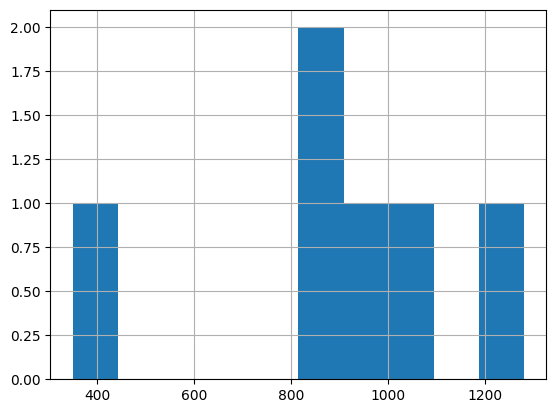

In [109]:
df[df.country_of_origin == 'Haiti'].altitude_mean_meters.hist()

In [110]:
df.altitude_mean_meters.describe()

count    1306.000000
mean     1327.197559
std       421.100584
min        50.000000
25%      1100.000000
50%      1310.640000
75%      1600.000000
max      4287.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

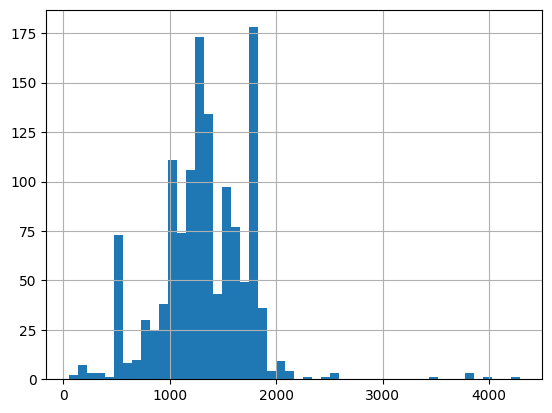

In [111]:
df.altitude_mean_meters.hist(bins=50)

In [112]:
df[df.altitude_mean_meters < 800 ].country_of_origin.unique()

array(['Hawaii', 'Taiwan', 'Haiti'], dtype=object)

In [113]:
df[df.altitude_mean_meters > 2500 ].country_of_origin.unique()

array(['Colombia', 'Myanmar', 'Indonesia'], dtype=object)

In [114]:
df[df.country_of_origin =='Myanmar'].altitude_mean_meters.describe() # Myanmar

count       8.000000
mean     2869.800000
std      1503.122556
min       914.400000
25%      1181.100000
50%      3812.500000
75%      3884.000000
max      4287.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

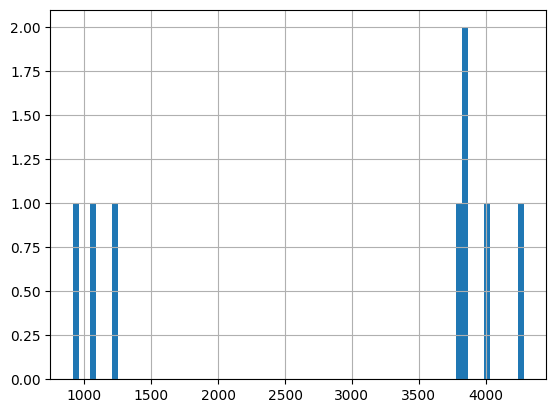

In [115]:
df[df.country_of_origin =='Myanmar'].altitude_mean_meters.hist(bins=80) # its impossible to grow coffee as high as 4200 

In [116]:
min_altitude_myanmar = df[df.country_of_origin == 'Myanmar'].altitude_mean_meters.min()
df.loc[(df.country_of_origin =='Myanmar') & (df.altitude_mean_meters > 2500), 'altitude_mean_meters' ] = min_altitude_myanmar

<AxesSubplot: >

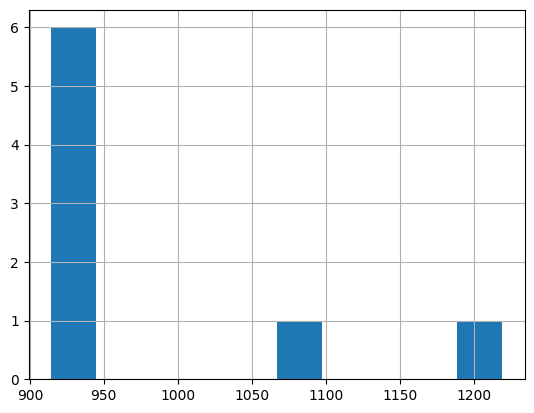

In [117]:
df[df.country_of_origin =='Myanmar'].altitude_mean_meters.hist() 

In [118]:
df[df.country_of_origin =='Indonesia'].altitude_mean_meters.describe() 

count      20.000000
mean     1468.750000
std       488.746719
min      1200.000000
25%      1300.000000
50%      1350.000000
75%      1425.000000
max      3500.000000
Name: altitude_mean_meters, dtype: float64

<AxesSubplot: >

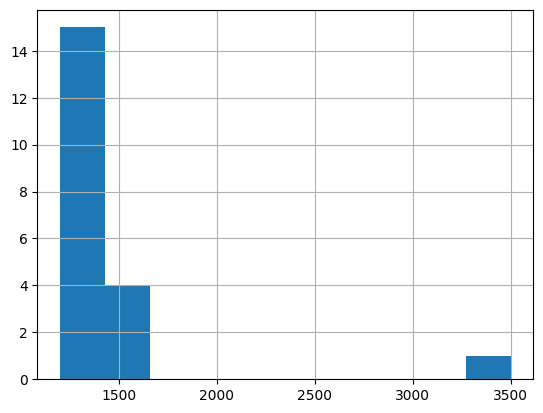

In [119]:
df[df.country_of_origin =='Indonesia'].altitude_mean_meters.hist()

In [120]:
median_altitude_indonesia = df[df.country_of_origin == 'Indonesia'].altitude_mean_meters.median()
df.loc[(df.country_of_origin == 'Indonesia') & (df.altitude_mean_meters > 1800), 'altitude_mean_meters'] = median_altitude_indonesia

<AxesSubplot: ylabel='Density'>

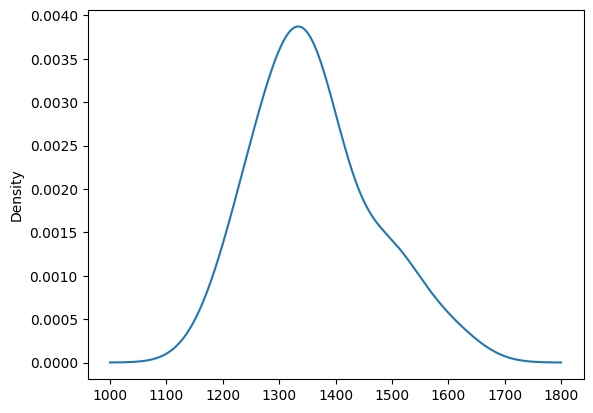

In [121]:
df[df.country_of_origin =='Indonesia'].altitude_mean_meters.plot.kde()

In [122]:
df.altitude_mean_meters = df.altitude_mean_meters.astype(int)
df.altitude_mean_meters.info()

<class 'pandas.core.series.Series'>
Int64Index: 1306 entries, 1 to 1312
Series name: altitude_mean_meters
Non-Null Count  Dtype
--------------  -----
1306 non-null   int32
dtypes: int32(1)
memory usage: 15.3 KB


## Still - some coffee get zero points (?). Let`s look at that.

In [123]:
df.total_cup_points.describe()

count    1306.000000
mean       82.123714
std         3.516596
min         0.000000
25%        81.170000
50%        82.500000
75%        83.670000
max        90.580000
Name: total_cup_points, dtype: float64

In [124]:
df[df.total_cup_points == 0]

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1312,bismarck castro,Honduras,Caturra,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400


In [125]:
df.drop(index=1312, inplace = True) ## drop that row - it looks like 'bad' record

In [126]:
df.describe()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,7.570352,7.524797,7.404628,7.540858,7.523625,7.523716,9.841318,9.840015,9.913042,7.503923,82.186644,1313.799234
std,0.315431,0.341612,0.348863,0.318481,0.292971,0.349505,0.489526,0.723474,0.446908,0.427375,2.683274,384.434721
min,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,0.000000,1.330000,5.170000,59.830000,50.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,1100.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,1310.000000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,1600.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,2560.000000


## It looks like someone gave '0' points for clean_cup. Let`s delete this record

In [127]:
df[df.clean_cup == 0]

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
1307,juan carlos garcia lopez,Mexico,Bourbon,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.0,0.0,10.0,6.75,68.33,900


In [128]:
df.drop(index=1307, inplace = True)

In [129]:
df.describe()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
count,1304.000000,1304.00000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,7.570729,7.52533,7.405514,7.540951,7.523834,7.524310,9.841196,9.847561,9.912975,7.504502,82.197270,1314.116564
std,0.315260,0.34120,0.347527,0.318585,0.292985,0.348981,0.489694,0.670410,0.447073,0.427029,2.656692,384.411192
min,5.080000,6.08000,6.170000,5.250000,5.250000,6.080000,6.000000,1.330000,1.330000,5.170000,59.830000,50.000000
25%,7.420000,7.33000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,1100.000000
50%,7.580000,7.58000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.540000,1310.000000
75%,7.750000,7.75000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,1600.000000
max,8.750000,8.83000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,2560.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 1 to 1310
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   owner                 1304 non-null   object 
 1   country_of_origin     1304 non-null   object 
 2   variety               1304 non-null   object 
 3   processing_method     1304 non-null   object 
 4   aroma                 1304 non-null   float64
 5   flavor                1304 non-null   float64
 6   aftertaste            1304 non-null   float64
 7   acidity               1304 non-null   float64
 8   body                  1304 non-null   float64
 9   balance               1304 non-null   float64
 10  uniformity            1304 non-null   float64
 11  clean_cup             1304 non-null   float64
 12  sweetness             1304 non-null   float64
 13  cupper_points         1304 non-null   float64
 14  total_cup_points      1304 non-null   float64
 15  altitude_mean_meters 

In [131]:
df.sweetness.describe() #?

count    1304.000000
mean        9.912975
std         0.447073
min         1.330000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: sweetness, dtype: float64

## Last thing are - sweetness / uniformity / clean_cup descriptors. There are to many 10`s (???).  I will leave those columns as it is - but that looks suspiciously.

##  Cleaning data could be shorter but I was practicing with Pandas this way. Altitude_mean_meters column had a lot of 'funny' value. In fact - a lot of real-word data have error-kind-of-data.
## Let`s look deeper into dataset.
## First - correlation. 

C:\Users\JASNYP\AppData\Local\Temp\ipykernel_18196\4207518107.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<AxesSubplot: >

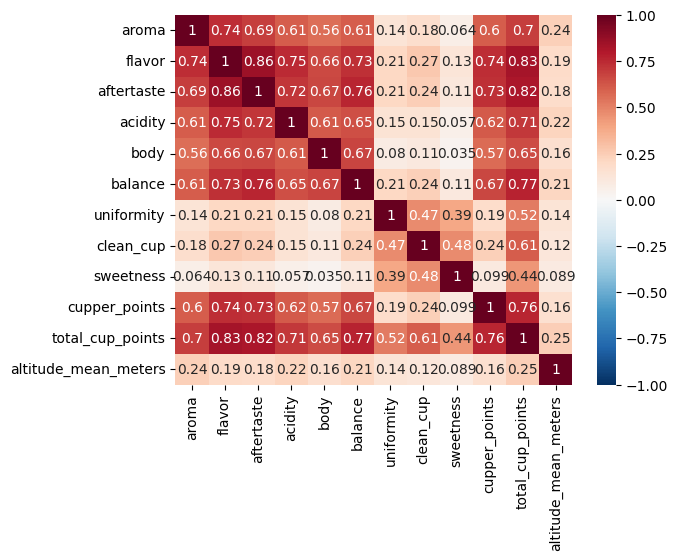

In [132]:
sns.heatmap(
    df.corr(),
    cmap='RdBu_r',
    annot = True,
    vmin=-1, vmax=1
)

<AxesSubplot: xlabel='aroma', ylabel='flavor'>

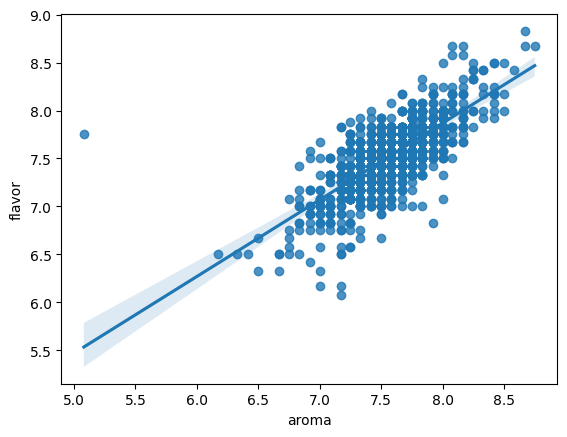

In [133]:
sns.regplot(
x='aroma', 
y='flavor', 
data=df)
# plt.xlabel('AROMA')
# plt.ylabel('FLAVOR')

<AxesSubplot: xlabel='aftertaste', ylabel='flavor'>

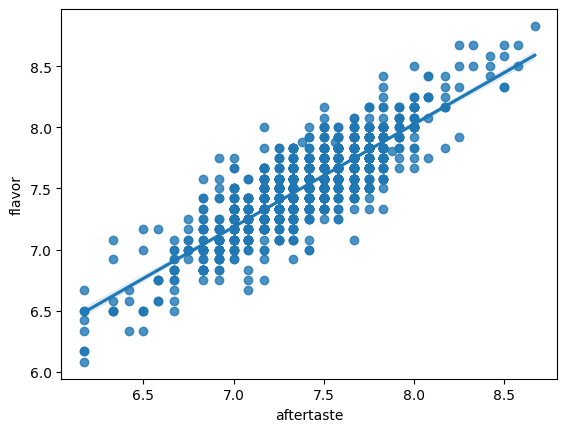

In [134]:
sns.regplot(
x='aftertaste', 
y='flavor', 
data=df)

<AxesSubplot: xlabel='acidity', ylabel='balance'>

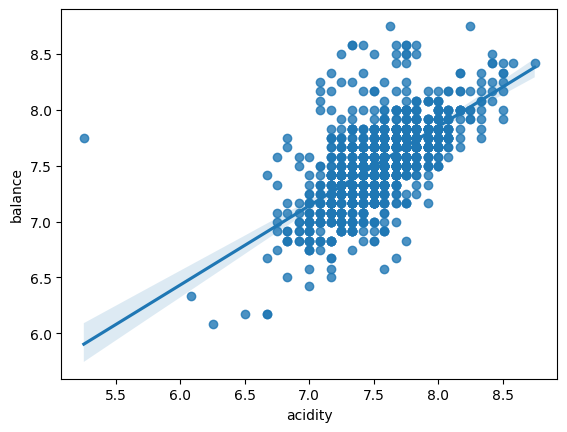

In [135]:
sns.regplot(
x='acidity', 
y='balance', 
data=df)

<AxesSubplot: xlabel='sweetness', ylabel='clean_cup'>

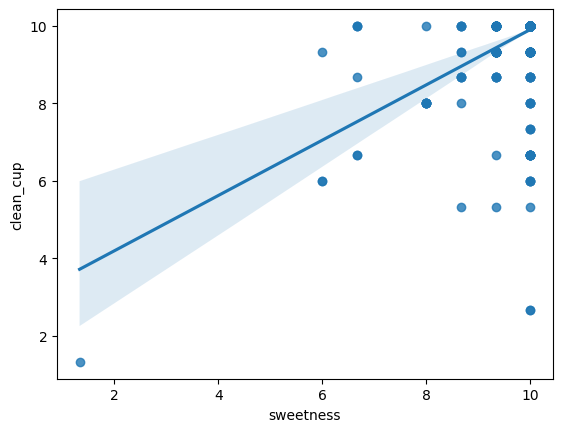

In [136]:
sns.regplot(
x='sweetness', 
y='clean_cup', 
data=df)

<AxesSubplot: xlabel='sweetness', ylabel='cupper_points'>

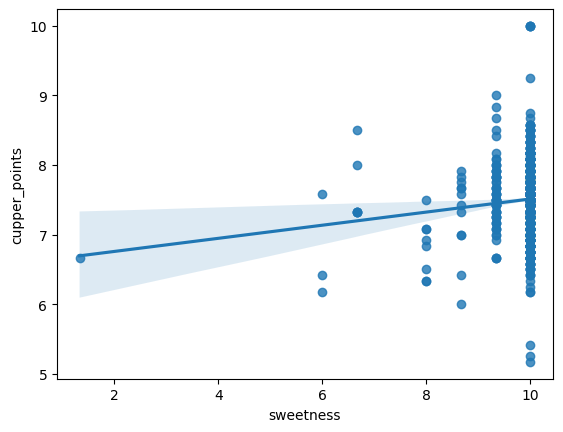

In [137]:
sns.regplot(
x='sweetness', 
y='cupper_points', 
data=df)

## Let`s find out some relationship between coffee descriptors and processing method.

In [138]:
proc_method = df.processing_method.value_counts()
print(f'methods: {proc_method.index}')
print(f'values: {proc_method.values}')

methods: Index(['Washed / Wet', 'Natural / Dry', 'unknown', 'Semi-washed / Semi-pulped',
       'Other', 'Pulped natural / honey'],
      dtype='object')
values: [810 250 149  56  26  13]


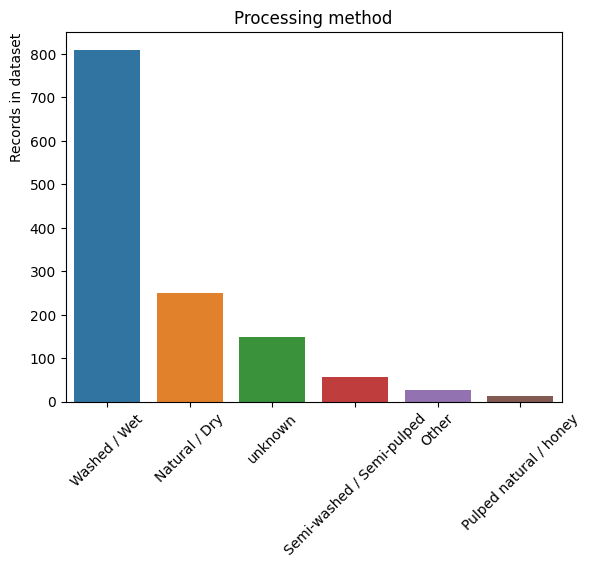

In [139]:
sns.barplot(
    x= proc_method.index, 
    y= proc_method.values,
    )
# plt.xlabel('Processing method')
plt.ylabel('Records in dataset', loc='top')
plt.xticks(rotation=45)
plt.title('Processing method')
plt.show()


## The most popular processing method in our dataset is 'washed'. In fact - it is the most popular and widely use method, especially in developed countries. Second most popular method in the world is 'natural' - it is a fact once again.
## Let`s see is there any correlation between some coffee descriptors and processing method.

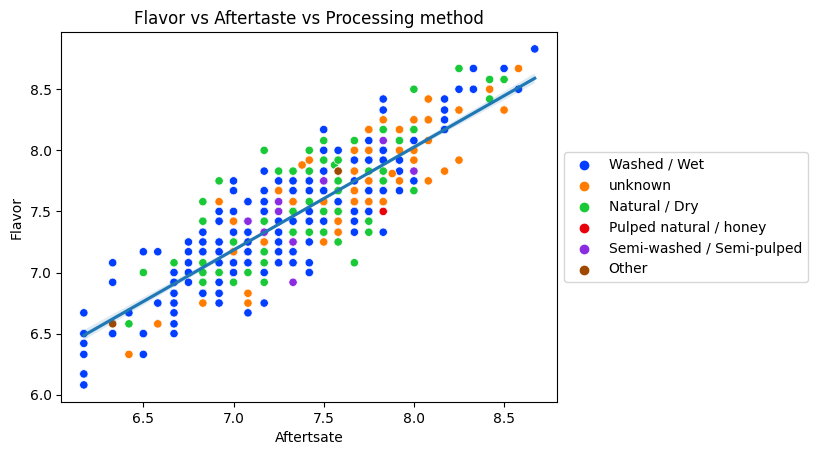

In [140]:
sns.scatterplot(
    x='aftertaste',
    y='flavor', 
    data=df,
    palette='bright',
    hue='processing_method')

sns.regplot(x='aftertaste', y='flavor', data=df, scatter=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Flavor vs Aftertaste vs Processing method')
plt.xlabel('Aftertsate')
plt.ylabel('Flavor')
          
plt.show()

## The higher points for flavor - the higher will be aftertaste points - doesn`t matter the processing method. 

In [141]:
countries = df.country_of_origin.value_counts().head() # Who is the biggest producer - in our dataset 
countries.index

Index(['Mexico', 'Colombia', 'Guatemala', 'Brazil', 'Taiwan'], dtype='object')

## The most records is from Mexico - in fact - Mexico is a big producer but not as big as Brazil. It is a big producer of specialty coffee but Brazil is not as big as Mexico in that field. As our dataset is about specialty coffee - that make sense. Let`s look at the biggest producers from our dataset

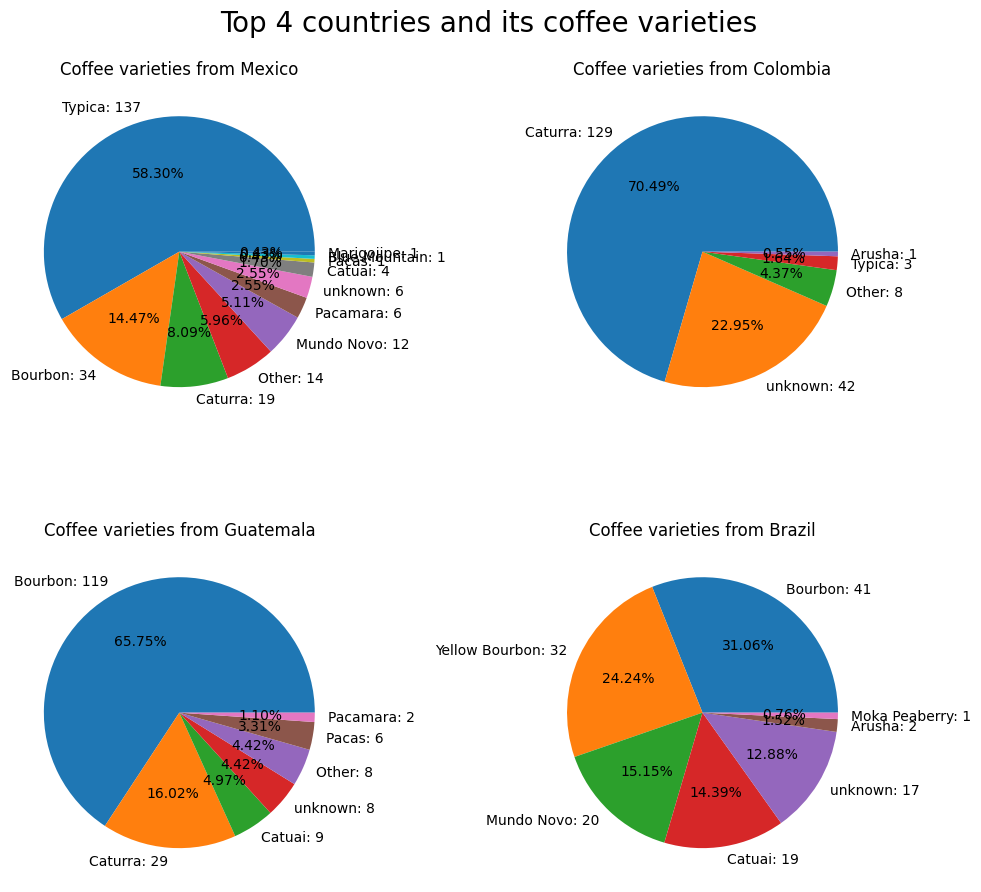

In [142]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))


# #Mexico
mexico_variety = df[df.country_of_origin == 'Mexico'].variety.value_counts()
sizes = mexico_variety
labels = mexico_variety.index
axs[0,0].pie(mexico_variety, labels=[f'{label}: {size}' for label, size in zip(labels, sizes)], autopct='%1.2f%%')
axs[0,0].set_title('Coffee varieties from Mexico')

# # #Colombian varieties
colombia_variety = df[df.country_of_origin == 'Colombia'].variety.value_counts()
sizes = colombia_variety
labels = colombia_variety.index
axs[0,1].pie(colombia_variety, labels=[f'{label}: {size}' for label, size in zip(labels, sizes)], autopct='%1.2f%%')
axs[0,1].set_title('Coffee varieties from Colombia')


# #Guatemala varieties
guatemala_variety = df[df.country_of_origin == 'Guatemala'].variety.value_counts()
sizes = guatemala_variety
labels = guatemala_variety.index
axs[1,0].pie(guatemala_variety, labels=[f'{label}: {size}' for label, size in zip(labels, sizes)], autopct='%1.2f%%')
axs[1,0].set_title('Coffee varieties from Guatemala')


#Brazil varieties
brazil_variety = df[df.country_of_origin == 'Brazil'].variety.value_counts()
sizes = brazil_variety
labels = brazil_variety.index
axs[1,1].pie(brazil_variety, labels=[f'{label}: {size}' for label, size in zip(labels, sizes)], autopct='%1.2f%%')
axs[1,1].set_title('Coffee varieties from Brazil')

fig.subplots_adjust(wspace=0.5) #distance between plots
title = fig.suptitle('Top 4 countries and its coffee varieties', y=.95, fontsize=20)
plt.tight_layout() #adjust layout
plt.show()

## Interesting thing is that every country has got some different coffee varieties. The most popular variety for Mexico is Typica but for Colombia is Caturra. Brazil is popular for its Bourbon coffee variety just like Guatemala. 
## Let`s see what is the most popular coffee variety in our dataset.

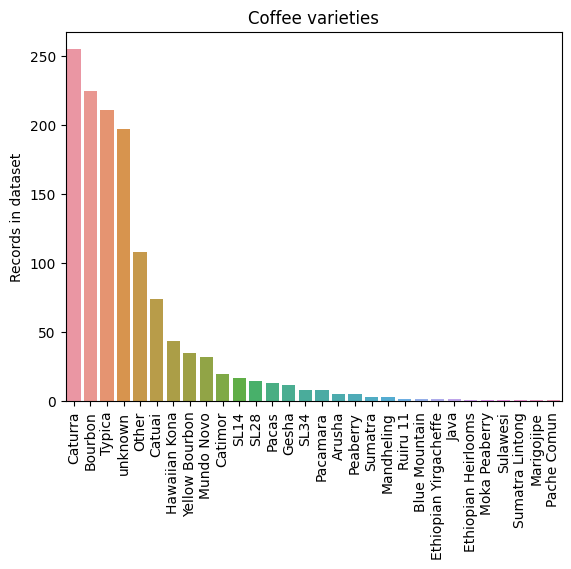

In [143]:
varieties = df.variety.value_counts()
varieties.index
varieties.values


sns.barplot(
    x= varieties.index, 
    y= varieties.values,
    )
# plt.xlabel('Processing method')
plt.ylabel('Records in dataset')
plt.xticks(rotation=90)
plt.title('Coffee varieties')
plt.show()


## The most popular variety in our dataset is Caturra but the second one is Bourbon. Those varieties are very popular in the word of coffee 

## Who is the biggest owner - who has got the most of the records in our dataset ? 

In [144]:
df.owner.value_counts()

juan luis alvarado romero           155
racafe & cia s.c.a                   59
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
coffeebythebag.com , inc              1
edwin agasso                          1
coffee export                         1
romulo bello flores                   1
ricardo aaron sampieri marini         1
Name: owner, Length: 303, dtype: int64

## The most popular producer is 'Juan Luis Alvarado Romero' - 155records. Lets find out what is his country and most popular coffee variety and processing_method. What is the mean of cupping points that his coffee got.

In [145]:
df[df.owner == 'juan luis alvarado romero'].head(5)

,owner,country_of_origin,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,altitude_mean_meters
53,juan luis alvarado romero,Guatemala,Bourbon,Washed / Wet,7.92,8.08,7.92,8.08,8.08,7.83,10.0,10.0,10.0,8.00,85.92,1395
58,juan luis alvarado romero,Guatemala,Bourbon,Washed / Wet,7.83,8.00,8.00,8.17,7.83,8.00,10.0,10.0,10.0,8.00,85.83,1524
59,juan luis alvarado romero,Guatemala,Catuai,Washed / Wet,8.00,8.00,7.83,8.33,7.83,7.83,10.0,10.0,10.0,8.00,85.83,1417
70,juan luis alvarado romero,Guatemala,Bourbon,Washed / Wet,8.00,7.83,7.67,8.33,7.83,8.00,10.0,10.0,10.0,7.83,85.50,1731
84,juan luis alvarado romero,Guatemala,Bourbon,unknown,8.00,7.92,7.75,8.00,7.92,7.83,10.0,10.0,10.0,7.83,85.25,1395


In [ ]:
juan_variety = df[df.owner == 'juan luis alvarado romero'].variety.value_counts() ## most popular variety
sns.barplot(x = juan_variety.index, y = juan_variety.values)
plt.ylabel('Records in dataset')
# plt.xticks(rotation=90)
plt.title('Juan Luis Alvarado Romero - coffee varieties')
plt.show()

In [ ]:
juan_method = df[df.owner == 'juan luis alvarado romero'].processing_method.value_counts() ## most popular processing method
juan_method 

In [ ]:
sizes = juan_method
labels = juan_method.index
plt.pie(juan_method, labels=[f'{label}: {size}' for label, size in zip(labels, sizes)], autopct='%1.2f%%')
plt.title('Juan Luis Alvarado Romero  - processing method')
plt.show()

In [ ]:
df[df.owner == 'juan luis alvarado romero'].total_cup_points.mean() ## cuppig points

In [ ]:
df[(df.owner == 'juan luis alvarado romero') & (df.processing_method == 'Washed / Wet' )].total_cup_points.mean()

## The most popular country of origin with coffee points above 80+ ( It means coffee got the - 'specialty' - title )

In [ ]:
country_with_points = df[df.total_cup_points > 80].country_of_origin.value_counts() 

In [ ]:
sns.barplot(x = country_with_points.index, y = country_with_points)
plt.xticks(rotation=90)
plt.ylabel('Records')
plt.title('Countries with coffee points above 80')
plt.show()

## Is there any coffee with less than 80 points in total  ?

In [ ]:
country_with_points = df[df.total_cup_points < 80].country_of_origin.value_counts() 
sns.barplot(x = country_with_points.index, y = country_with_points)
plt.xticks(rotation=90)
plt.ylabel('Records')
plt.title('Countries with coffee points less than 80')
plt.show()

## We have to understand - not every coffee get 80+, so there are some coffee that get less than 80 points.

## The most popular country with coffee above 80points is Colombia. In fact - Colombia has got really good quality coffees. Let`s look at Colombian coffee

In [ ]:
colombia_coffee = df[df.country_of_origin == 'Colombia'].owner.value_counts() ## most popolar owner / producer
sns.barplot(x = colombia_coffee.index, y = colombia_coffee)
# plt.xlabel('owner')
plt.xticks(rotation=90)
plt.ylabel('Records')
plt.title('Producers in Colombia')
plt.show()

In [ ]:
total_points_colombia = df[df.country_of_origin == 'Colombia'].total_cup_points
sns.boxplot(y = total_points_colombia)

In [ ]:
# processing method in Colombia 
proc_met_colombia = df[df.country_of_origin == 'Colombia'].processing_method.value_counts()
sns.barplot(x = proc_met_colombia.index, y = proc_met_colombia)
plt.title('Processing method in Colombia')
plt.xlabel('')
plt.ylabel('')
plt.show()


In [ ]:
mask_colombia = df[df.country_of_origin == 'Colombia']

sns.barplot(
x = 'processing_method',
y = 'total_cup_points',
    estimator = 'mean',
data = mask_colombia)
plt.xticks(rotation=45)
plt.ylabel('Points')
plt.xlabel('')
plt.title('Processing method / mean total cupping points')

plt.show()

## One of my favorite coffee comes from Kenya.

In [ ]:
df[df.country_of_origin == 'Kenya'].head(5)

In [ ]:
variety_kenya = df[df.country_of_origin == 'Kenya'].variety.value_counts()

#Kenya varieties
sizes = variety_kenya 
labels = variety_kenya .index
plt.pie(variety_kenya , labels=[f'{label}: {size}' for label, size in zip(labels, sizes)], autopct='%1.2f%%')
plt.title('Coffee varieties from Kenya')
plt.show()


## In fact - the most popular coffee variety in Kenya is SL - that comes from Scott Agricultural Laboratories  from 1930s

In [ ]:
df[df.country_of_origin == 'Kenya'].total_cup_points.mean()

In [ ]:
df.variety.value_counts()

## Let`s look at one of the most expensive specialty coffee variety - Gesha.

In [ ]:
df[df.variety == 'Gesha']

## All Gesha coffees get 10/10 for uniformity and clean_cup and sweetness. It may not be an error like I thought before. Lets look if any other coffee get 10by10 

In [ ]:
df.query('uniformity == 10 & clean_cup == 10 & sweetness == 10')

## It looks like 1079 coffees get 10by10 ... is it possible ? 

## Gesha - in fact - is grown in Africa and Panama as well. Which Gesha got better points ? 

In [ ]:
gesha_coffee = df[df.variety == 'Gesha']
sns.barplot(x = 'country_of_origin', y = 'total_cup_points', data = gesha_coffee, estimator = 'mean')
plt.xlabel('')
plt.ylabel('')
plt.title('Gesha coffee / mean total cupping points')
plt.show()


# df[df.variety == 'Gesha'].total_cup_points.max()

## 'The best' Gesha coffee got only 85.83 points and it is just a little bit above the mean (82.12). Have to remember that we have only one record with Gesha coffee from Panama. 

In [ ]:
df.total_cup_points.max()

## What is 'the best' coffee with 90.58 points ?

In [ ]:
df[df.total_cup_points == df.total_cup_points.max()]

## It is coffee from Ethiopia ! 

## Checking the avarage points grouping by country

In [ ]:
df[['country_of_origin', 'total_cup_points']].groupby('country_of_origin').mean().sort_values(by = 'total_cup_points', ascending = False)

## What are the top rated varieties ? 

In [ ]:
df.variety.value_counts().index 

In [ ]:
top_rated_variety = df[['variety', 'total_cup_points']].groupby('variety').mean().sort_values(by = 'total_cup_points', ascending = False)
top_rated_variety

In [ ]:
top_rated_variety = pd.DataFrame(top_rated_variety)
top_rated_variety.index

In [ ]:
sns.barplot( x = top_rated_variety.index, y = top_rated_variety.total_cup_points)
plt.xlabel('Variety')
plt.xticks(rotation=90)
plt.ylabel('Total cup points')
plt.title('Top rated varieties')
plt.show()

## We see that the top rated variety is Yirga from Ethiopia. At the same time the most popular varities in our dataset are: Caturra, Bourbon and Typica. We can see that the most popular varieties are not top rated one.
## How many records of Yirga we have ? 

In [ ]:
df[df.variety == 'Ethiopian Yirgacheffe'] # in fact there are only two records with this variety AND both are above the mean of total_cup_points ( )


In [ ]:
filtered_SL = df.query("variety == 'SL34' or variety == 'SL28' or  variety == 'SL14' ")
filtered_SL.describe() 

## One of the top rated varieties are coffee from Scott Agricultural Laboratories - SL34, SL28, SL14. Let`s have look at the SL-coffees

In [ ]:
filtered_SL.head()

In [ ]:
filtered_SL.country_of_origin.value_counts() # most are from Kenya

In [ ]:
filtered_SL.total_cup_points.mean() 

## This dataset is not big enough to get a global information about 'coffee quality'. It would be perfect to have more datasets like this one - straight from cupping session - and to investigate it.

In [ ]:
df.to_csv('cleaned_arabica_dataset.csv')